In [281]:
import pandas as pd

Za začetek shranimo podatke o knjigah, žanrih in nagradah v nove spremenljivke. Za indeksni stolpec pri vseh treh izberem "id_knjige". Ta je določen enolično, saj ga vsaka knjiga dobi glede na mestno na lestvici, mesta pa se ne ponavljajo.

Opomba: Če kdaj želimo sortirati po "score", je vseeno če sortiramo po id_knjige, saj "score" določi mesto knjige na lestvici (knjiga z najvišjim se nahaja na prvem mestu).

In [282]:
knjige = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv', index_col='id_knjige').sort_values('id_knjige')

In [283]:
knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
4,Pride and Prejudice,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,The Fifth Elephant,Terry Pratchett,1654,True,They say that diplomacy is a gentle art. That ...,2008,Corgi,4.24,2259,34,66196,1517,True
1897,At First Sight,Nicholas Sparks,2345,True,There are a few things Jeremy Marsh was sure h...,2006,Grand Central Publishing,3.83,2258,32,78599,3687,False
1898,The Prince and the Pauper,Mark Twain,1244,False,"This treasured historical satire, played out i...",2002,Signet,3.86,2257,44,108361,2231,False


In [284]:
zanri = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzeni_zanri.csv',index_col='id_knjige').sort_values('id_knjige')

In [285]:
zanri

,zanr
id_knjige,
1,young-adult
1,fiction
1,dystopia
2,fantasy
2,young-adult
...,...
1899,fiction
1899,japanese-literature
1900,science-fiction


In [286]:
nagrade = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_nagrade.csv',index_col='id_knjige').sort_values('id_knjige')

In [287]:
nagrade

,nagrada
id_knjige,
1,Locus Award Nominee for Best Young Adult Book
1,New Mexico Land of Enchantment Award for Young...
1,Eliot Rosewater Indiana High School Book Award
1,The Inky Awards for Silver Inky
1,California Young Readers Medal for Young Adult
...,...
1895,Lincoln Award Nominee
1895,Endeavour Award Nominee
1895,CYBILS Award Nominee for Fantasy &amp; Science...


# Kateri žanri so najbolj priljubljeni?

Ugotoviti želim, kateri žanri so najbolj priljubleni med prvimi pettisočimi knjigami.<br>
Ker se lahko zgodi, da je začetnih nekaj sto knjig(najbolje ocenjene) večinoma enega žanra, večinski preostanek pa drugega, bom analizirala najbolj priljubljen žanr za prvih 100, 1000 in 5000 knjig. S tem želim preveriti tudi ali nek žanr prevladuje na celotni lestvici ali pa je prisoten zgolj na vrhu in se kasneje porazdeli z drugimi žanri.<br>
Ugotoviti želim tudi priljubljenost žanra glede na desetletje izdaje del:<br>
TO DO:morda porazdelitev vodilnega zanra po letih/porazdelitev vodilnih treh zanrv po desetletjih<br>
Ker pri vsaki knjigi zajamem tri žanre, moram za prvih 100 knjig torej vzeti prvih 300 žanrov. Podobno za 1000 in 5000 knjig.

In [288]:
priljubljeni_zanri_100 = zanri.head(300).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [289]:
priljubljeni_zanri_100.head(10)

,st_zanrov
zanr,
fiction,91
classics,63
fantasy,25
young-adult,21
historical-fiction,18
romance,10
science-fiction,9
childrens,7
horror,6


Med prvimi stotimi knjigami sta torej najbolj priljubljena fikcija(fiction) in klasika(classics), sledijo fantastika(fantasy), literatura za mlade(young-adult, 12-18 let) in zgodovinska fikcija(historical-fiction).

Poglejmo ali se priljubljenost zanrov spremni, ko pogledamo širše po lestvici.

In [290]:
priljubljeni_zanri_1000 = zanri.head(3000).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [291]:
priljubljeni_zanri_1000.head(10)

,st_zanrov
zanr,
fiction,694
classics,356
fantasy,275
young-adult,247
historical-fiction,148
romance,145
contemporary,97
science-fiction,76
non-fiction,67


In [292]:
priljubljeni_zanri = zanri.groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [293]:
priljubljeni_zanri.head(10)

,st_zanrov
zanr,
fiction,1216
fantasy,526
classics,520
young-adult,485
romance,286
historical-fiction,259
contemporary,220
science-fiction,145
non-fiction,144


TO DO:komentar priljubljenosti zanrov za 1000 in 5000

Sedaj želim preveriti najbolj priljubljeni žanri soupadajo tudi z najbolj nagrajenimi žanri.

In [294]:
zanri_z_nagrado = pd.merge(zanri,nagrade,left_on='id_knjige',right_on='id_knjige').groupby('zanr').size().to_frame('st_nagrad').sort_values('st_nagrad',ascending=False)

In [295]:
zanri_z_nagrado.head(10)


,st_nagrad
zanr,
fiction,2636
young-adult,1734
fantasy,1257
historical-fiction,635
romance,625
contemporary,600
classics,467
science-fiction,445
dystopia,336


Med desetimi najbolj priljubljenimi žanri in desetimi najbolj nagrajenimi žanri so le manjše razlike: nekateri žanri so pridobili/izgubili nekaj mest na lestvici, dystopia pa je zamenjala non-fiction.<br>
Po lestvici je glede na število nagrad najbolj nazadovala klasika, kar pa gre lahko pripisati tudi dejstvu, da imamo danes veliko več literarnih nagrad kot v letih izida klasikov.

Poglejmo še, koliko nagrad na knjigo je v povprečju prejel vsak žanr.

In [296]:
zanri_nagrade = pd.merge(zanri_z_nagrado,priljubljeni_zanri,left_on='zanr',right_on='zanr')

In [297]:
zanri_nagrade['nagrada_na_knjigo'] = zanri_nagrade.st_nagrad / zanri_nagrade.st_zanrov

In [298]:
zanri_nagrade.sort_values('nagrada_na_knjigo')[::-1].head(10)

,st_nagrad,st_zanrov,nagrada_na_knjigo
zanr,,,
realistic-fiction,35,2,17.500000
steampunk,21,2,10.500000
cyberpunk,23,3,7.666667
new-york,6,1,6.000000
middle-grade,58,10,5.800000
dragons,22,4,5.500000
south-africa,5,1,5.000000
music,15,3,5.000000
australia,5,1,5.000000


Poglejmo še ali so bolj priljubljeni žanri tudi bolje ocenjeni.

In [299]:
zanri_in_ocena = pd.merge(zanri,knjige['povprecna_ocena'],left_on='id_knjige',right_on='id_knjige')

In [300]:
zanri_in_ocena.groupby('zanr').mean().sort_values('povprecna_ocena', ascending=False).head(10)

,povprecna_ocena
zanr,
parenting,4.640000
lds,4.465000
gaming,4.450000
comics,4.425455
graphic-novels,4.397692
baseball,4.380000
astronomy,4.370000
survival,4.360000
islam,4.350000


# Ali med priljubljenemi knjigami prevladujejo serije?

Zanima nas tudi ali so bolj priljubljene serije ali individualna dela. 


Za začetek poglejmo, kaj prevladuje med prvimi stotimi knjigami

In [301]:
knjige.head(100).groupby('serija').size()

serija
False    61
True     39
dtype: int64

Med knjigami na vrhu lestvice torej pravladujejo "solo" knjige. Upoštevati velja, da je npr. serija žanra fantastika/fikcija zelo pogosta, medtem ko je veliko redkejša pri klasikah.<br>
Pri žanrih smo videli, da sta si pri prvih stotih knjigah klasika in fikcija precej blizu, fantazija pa je na tretjem mestu s precjšnjim zaostankom, pri večjem številu knjig pa začne očitno prevladovati fikcija, klasika in fantazija pa sta precej izenačeni.<br>
Poglejmo si, če se delež serij poveča, če povečamo število knjig(fikcija je zdaj prevladujoči žanr, klasika in fantazija pa sta izenačei).

In [302]:
knjige.groupby('serija').size()

serija
False    941
True     959
dtype: int64

Vidimo, da sta tipa pri...<br>
Narišimo še graf, da vidmo spreminjanje količine serij in posameznih del po lestvici.
TO DO:GRAF

Sedaj narišimo grafa, ki ponazarjata število serij in posameznih del glede na število vseh knjig.<br>
Primer: Prva tri dela z lestvice so serije, četrto pa je posamezno delo. graf serij bo torej do vključno števila tri potekal po simetrali lihih kvadrantov, pri številu 4(štiri knjige), pa bo vrednost na y osi enaka 3(tri dela od štirih so serije).
Graf pozameznih del bo do vključno števila tri imel koordinate y osi enako nič, pri številu štiri pa ena.<br>
Če je torej na nekem delu graf serij nad grafom posameznih del to pomeni, da na tistem delu prevladujejo serije.<br>
Vsota grafov nam seveda vedno da simetralo lihih kvadrantov.

Definirati moramo funkciji, ki bosta šteli število serij in posameznih del glede na število vseh del.<br>
Spletna stran s podatki je pri nekaterih delih "sesuta", zato posameznih del s strani ni med našimi podatki. Id-ji knjig so podani glede na mesto na lestvici, tako da nam lahko nekaj id-jev manjka (nimamo vseh števil od 1 do 5000). Pri vpeljavi funkcij za štetje bi bilo to precej nerodno, zato vpeljemo "knjige2", pri katerih za indeksni stolpec vzamemo avtomatko generiran stolpec stevil od 0 do dolžine tabele. Pri definiranju funkcij in risanju grafa bomo namesto z id_knjige torej delali s tem stolpcem.

In [303]:
knjige2 = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv')

In [304]:
knjige2.head(5)

,knjiga,id_knjige,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
0,The Hunger Games,1,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
1,Harry Potter and the Order of the Phoenix,2,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
2,To Kill a Mockingbird,3,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
3,Pride and Prejudice,4,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
4,Twilight,5,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True


Definiramo funkciji, ki štejeta serije in posamezna dela.<br>
Funkciji za vsako delo v seznam zapišeta, koliko del nad delom(vključno s trenutnim delom) je serija/posamezno delo.

In [305]:
def stej_serije(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==True:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==True:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez
    

In [306]:
def stej_solo(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==False:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==False:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez

Najprej narišimo grafa za prvih sto del.

In [307]:
a = stej_serije(100)

In [308]:
b = stej_solo(100)

In [309]:
s= [i for i in range(1, len(a)+1)]

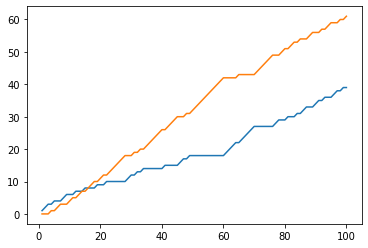

In [310]:
from matplotlib import pyplot as plt
plt.plot(s,a)
plt.plot(s,b)

Oranžen graf predstavlja posamezna dela, moder pa serije. Vidimo, da med približno prvimi petnajstimi deli prevladujejo serije, nato pa je delež posameznih del večji (v prejšnjih izračunih smo videli, da je razmerje posameznih del proti serijam v prvi stoterici približno 6:4.<br>
Sedaj si poglejmo, kako se količini spreminjata skozi celotno lestvico.

In [311]:
a_cel = stej_serije(len(knjige2))

In [312]:
b_cel = stej_solo(len(knjige2))

In [313]:
s_cel= [i for i in range(1, len(knjige2)+1)]

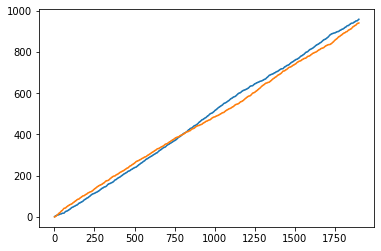

In [314]:
plt.plot(s_cel,a_cel)
plt.plot(s_cel,b_cel)

Vidimo, da je delež serij in posameznih del približno enak. Na začetku rahlo prevladujejo posamezna dela, kasneje pa serije. Zdi se torej, da dejstvo, da je delo del serije ali ne, ne vpliva splošno priljubljenost dela(med najbolj priljubljenimi deli je približno polovica serij in polovica posameznih del).

Poglejmo še, pri katerem tipu je povprečna ocana bralcev višja(ocena od 1 do 5).<br>
Opomba: Prej smo analizirali glede na score, v katerem so združeni st_reviewov, povprecna_ocena, st_glasov, st_ocen...

In [315]:
povprecna_ocena_serije = knjige[knjige.serija == True].povprecna_ocena.mean()

In [316]:
povprecna_ocena_solo = knjige[knjige.serija == False].povprecna_ocena.mean()

In [317]:
povprecna_ocena_serije

4.103274244004171

In [318]:
povprecna_ocena_solo

4.040106269925611

Povprečna ocena serij je torej za malenkost višja, toda razlika je zanemarljiva(0,05 točke). Ocena bralcev je torej praktično ista za serije in posamezna dela.

Glede na našo analizo lahko torej zaključimo, da je bralcem vseeno ali berejo serije ali posamezna dela.

# Kateri avtorji in založbe so imeli največ uspešnic?

ideja:najti najbolj uspesnega avtorja pri najbolj priljubljenih zanrih
Znova bomo najuspešnejšega avtorja poiskali v različno velikih skupinah: 100, 1000 in 10000 knjig.

Za začetek si poglejmo, kateri avtorji imajo največ del na čistem vrhu lestvice in med prvimi 5000 deli na lestvici:

Iščemo avtorja z največ deli med prvo stoterico:

In [319]:
st_knjig_avtorja_100 = knjige[['avtor','id_avtor']].head(100).groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [320]:
najboljsi_avtorji_100 = pd.merge(st_knjig_avtorja_100,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor')

In [321]:
najboljsi_avtorji_100.drop_duplicates(keep='last').sort_values('st_knjig',ascending=False).head(10)

,id_avtor,st_knjig,avtor
10,1077326,4,J.K. Rowling
17,569,2,Khaled Hosseini
26,656983,2,J.R.R. Tolkien
37,239579,2,Charles Dickens
42,3137322,2,Fyodor Dostoyevsky
14,3706,2,George Orwell
264,630,1,Dan Brown
291,106,1,Madeleine L&#39;Engle
288,306,1,William Golding
287,316,1,Alice Sebold


J.K.Rowlin je torej napisala kar 4 izmed stotih najbolje ocenjenih knjig spletne strani.<br>

Poiščimo še najbolj uspešnega avtorja cele lestvice(oz. v našem primeru prvih 5000 del).

In [322]:
st_knjig_avtorja = knjige[['avtor','id_avtor']].groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [323]:
najboljsi_avtorji = pd.merge(st_knjig_avtorja_100,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor').drop_duplicates(keep='last').sort_values('st_knjig',ascending=False)

In [324]:
najboljsi_avtorji.head(20)

,id_avtor,st_knjig,avtor
10,1077326,4,J.K. Rowling
17,569,2,Khaled Hosseini
26,656983,2,J.R.R. Tolkien
37,239579,2,Charles Dickens
42,3137322,2,Fyodor Dostoyevsky
14,3706,2,George Orwell
264,630,1,Dan Brown
291,106,1,Madeleine L&#39;Engle
288,306,1,William Golding
287,316,1,Alice Sebold


Oglejmo si, katerega žanra so dela desetih najuspešnejših avtorjev.

In [325]:
tabela_avtorjev = [i for i in najboljsi_avtorji.id_avtor.head(20)]

In [326]:
tabela_avtorjev

[1077326,
 569,
 656983,
 239579,
 3137322,
 3706,
 630,
 106,
 306,
 316,
 432,
 566,
 585,
 589,
 614,
 947,
 811,
 903,
 2448,
 1244]

In [327]:
dela_najboljsih_avtorjev = knjige[(knjige.id_avtor).isin(tabela_avtorjev)]

In [328]:
zanr_del_najboljsih_avtorjev = pd.merge(dela_najboljsih_avtorjev, zanri,left_on='id_knjige',right_on='id_knjige').groupby('zanr')

In [329]:
zanr_del_najboljsih_avtorjev.size().to_frame('st_knjig_zanra').sort_values('st_knjig_zanra', ascending=False).head(10)

,st_knjig_zanra
zanr,
fiction,98
classics,72
fantasy,28
young-adult,16
plays,14
mystery,13
literature,11
philosophy,10
historical-fiction,10


Če je vaš cilj postati pisatelj z največ knjigami na lestvici goodreads vam torej za izbiro žanra priporočam fatasy/fiction.

TO DO:poiskati avtorja in zalozbo z najvec nagradami

Sedaj poiščimo še najbolj uspešno založbo.

In [330]:
st_knjig_zalozbe = knjige[['zalozba']].groupby('zalozba').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [331]:
st_knjig_zalozbe

,st_knjig
zalozba,
Vintage,58
Penguin Books,50
unknown,43
Penguin Classics,33
Ballantine Books,26
...,...
Harper Perennial Classics,1
Harper Paperbacks,1
Harper Collins Publisher,1


Sedaj poiščimo najbolj nagrajenega avtorja in založbo.

In [332]:
nagrajene_knjige = knjige[knjige.nagrade == True]

Za začetek poglejmo, katera založba ima največ del, ki so prejela vsaj eno nagrado.

In [333]:
nagrajene_knjige.groupby('zalozba').size().to_frame('st_nagrajenih_knjig').sort_values('st_nagrajenih_knjig', ascending=False).head(15)

,st_nagrajenih_knjig
zalozba,
Vintage,39
Penguin Books,22
Ballantine Books,18
Tor Books,18
Scribner,15
Random House,15
"Little, Brown and Company",15
HarperCollins,15
Atria Books,15


Poiščimo najbolj uspešno založbo po številu nagrad.

In [334]:
pd.merge(nagrajene_knjige, nagrade,left_on='id_knjige',right_on='id_knjige').groupby('zalozba').size().to_frame('st_nagrad').sort_values('st_nagrad', ascending=False).head(10)

,st_nagrad
zalozba,
Vintage,125
Scholastic Press,104
Alfred A. Knopf,96
"Little, Brown and Company",91
Knopf,70
Delacorte Press,67
Random House,66
Penguin Books,60
"Little, Brown Books for Young Readers",59


Poiščimo najbolj nagrajenega avtorja.

In [335]:
nagrajeni_avtorji = nagrajene_knjige.groupby('id_avtor').size().to_frame('st_nagrad').sort_values('st_nagrad', ascending=False).head(10)

In [336]:
najbolj_nagrajeni_avtorji = pd.merge(nagrajeni_avtorji, knjige[['id_avtor','avtor']],left_on='id_avtor',right_on='id_avtor').drop_duplicates(keep='last')

In [337]:
najbolj_nagrajeni_avtorji

,id_avtor,st_nagrad,avtor
29,3389,22,Stephen King
46,15872,12,Rick Riordan
64,1654,12,Terry Pratchett
75,1077326,11,J.K. Rowling
86,150038,10,Cassandra Clare
96,20248,9,J.R. Ward
106,3433047,9,Sarah J. Maas
118,137902,7,Richelle Mead
125,1330292,7,Maggie Stiefvater
132,2987,7,Sarah Dessen


Ugotovimo še, v katerem žanru ustvarjajo te pisatelji.

In [338]:
sez_naj_nagrajenih_avtorjev = [i for i in najbolj_nagrajeni_avtorji.id_avtor]

In [339]:
dela_naj_nagrajenih_avtorjev = knjige[(knjige.id_avtor).isin(sez_naj_nagrajenih_avtorjev)]

In [340]:
zanr_del_naj_nagrajenih_avtorjev = pd.merge(dela_naj_nagrajenih_avtorjev, zanri,left_on='id_knjige',right_on='id_knjige').groupby('zanr')

In [341]:
zanr_del_naj_nagrajenih_avtorjev.size().to_frame('st_knjig_zanra').sort_values('st_knjig_zanra', ascending=False).head(10)

,st_knjig_zanra
zanr,
fantasy,97
young-adult,74
fiction,58
romance,36
horror,28
paranormal,19
mythology,17
humor,17
vampires,15


# Ali obstaja časovno obdobje, v katerem je izšla večina knjig iz vrha seznama?


In [385]:
knjige_z_letom = knjige[knjige.leto != "unknown"]

In [397]:
desetletje= (pd.to_numeric(knjige_z_letom.leto).to_frame('desetletje')//10)*10

In [402]:
knjige_desetletje = pd.merge(knjige_z_letom[['id_avtor','serija','povprecna_ocena','nagrade']],desetletje,left_on='id_knjige',right_on='id_knjige')

<AxesSubplot:xlabel='desetletje'>

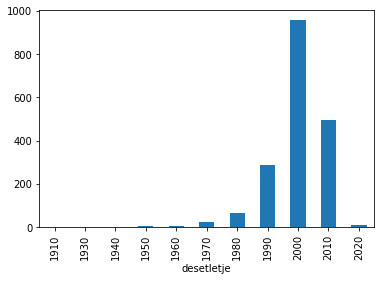

In [409]:
knjige_desetletje.groupby('desetletje').size().plot.bar()

# Ali so knjige z literarnimi nagradami tudi med bralci bolje ocenjene?
Želim preveriti ali bralci knjigam z literarnimi nagradami v povprečju dajo višjo oceno, kot tistim brez nagrad. Želim tudi preveriti, ali povprečna ocena s številom nagrad narašča.

Za začetek poglejmo, ali je med knjigami več knjig z nagradami ali brez.

In [344]:
knjige.groupby('nagrade').size()

nagrade
False     817
True     1083
dtype: int64

Večina knjig s seznama je torej prejela vsaj eno nagrado

In [345]:
povprecna_ocena_z_nagrado = knjige[knjige.nagrade == True].povprecna_ocena.mean()

In [346]:
povprecna_ocena_z_nagrado

4.078282548476454

In [347]:
povprecna_ocena_brez_nagrade = knjige[knjige.nagrade == False].povprecna_ocena.mean()

In [348]:
povprecna_ocena_brez_nagrade

4.063647490820073

Vidimo, da je ocena prvih sto knjig praktično ista za knjige z nagradami in knjige brez nagrad.
Poglejmo ali se situacija spremeni, ko pogledamo večje število knjig.

Sedaj si oglejmo ali se ocena nagrajenih knjig spreminja s stevilom nagrad

In [349]:
nagrajene_knjige = knjige[knjige.nagrade == True]

In [350]:
nagrajene_knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
6,The Book Thief,Markus Zusak,11466,False,It is 1939. Nazi Germany. The country is hol...,2006,Alfred A. Knopf,4.38,1407928,14526,1909675,115407,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,Lover at Last,J.R. Ward,20248,True,"Qhuinn, son of no one, is used to being on his...",2013,NAL,4.29,2265,29,64001,6117,True
1893,Seraphina,Rachel Hartman,357601,True,In her bestselling and Morris Award-winning...,2013,Random House Books for Young Readers,3.93,2265,29,84720,8224,True
1894,The Right Stuff,Tom Wolfe,3083854,False,When the future began... The men had it. Yeag...,2001,Bantam,4.22,2264,31,46596,1667,True


In [351]:
ocena_in_nagrade = pd.merge(nagrajene_knjige[['povprecna_ocena']],nagrade, left_on='id_knjige', right_on='id_knjige')

In [352]:
ocena_in_nagrade

,povprecna_ocena,nagrada
id_knjige,,
1,4.32,Locus Award Nominee for Best Young Adult Book
1,4.32,New Mexico Land of Enchantment Award for Young...
1,4.32,Eliot Rosewater Indiana High School Book Award
1,4.32,The Inky Awards for Silver Inky
1,4.32,California Young Readers Medal for Young Adult
...,...,...
1895,3.91,Lincoln Award Nominee
1895,3.91,Endeavour Award Nominee
1895,3.91,CYBILS Award Nominee for Fantasy &amp; Science...


In [353]:
knjige['st_nagrad']=ocena_in_nagrade.groupby('id_knjige').size().to_frame('st_nagrad')

In [354]:
ocena_z_nagradami = knjige.groupby('st_nagrad').povprecna_ocena.mean()

<AxesSubplot:xlabel='st_nagrad'>

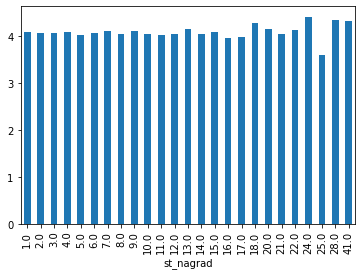

In [355]:
ocena_z_nagradami.plot.bar()

# Ugotavljanje žanra

In [517]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if len(beseda)<=3:
        return ''
    elif beseda[-3:] in ["ing","ity","ily"]:
        beseda=beseda[:-3]
    elif beseda[-2:] in ["ed","er","ly"]:
        beseda=beseda[:-2]
    return beseda.rstrip('sy')


In [518]:
def koreni_besed(niz):
    return pd.Series(sorted({koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split()}))

In [519]:
st_knjig_po_zanru = zanri.groupby('zanr').size().to_frame('verjetnost_zanra')

In [520]:
st_vseh_knjig = len(knjige)

In [521]:
verjetnost_zanra = (st_knjig_po_zanru / st_vseh_knjig)

In [522]:
verjetnost_zanra

,verjetnost_zanra
zanr,
19th-century,0.000526
action,0.000526
adult,0.002105
adult-fiction,0.001579
adventure,0.008947
...,...
world-war-i,0.000526
world-war-ii,0.001053
writing,0.001579


In [523]:
opisi_in_zanri = pd.merge(knjige, zanri, left_on='id_knjige', right_on='id_knjige')[['zanr', 'opis']]

In [524]:
tabela_korenov_in_knjig = knjige.opis.apply(koreni_besed)

In [525]:
tabela_korenov_in_knjig

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
id_knjige,,,,,,,,,,,,,,,,,,,,,
1,,against,age,alone,america,annual,become,been,beforeand,between,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,against,art,authoritie,boundle,corridor,dark,darkne,defense,depend,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,academ,alabama,also,alwa,american,appeal,award,became,behavior,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,appear,austen,beau,bennet,between,book,brilliant,call,character,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,about,absolute,bethat,bite,blood,deep,didnt,dominant,edward,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,,anyone,arent,bad,been,bigwig,certain,diplomac,diplomatic,direction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1897,,about,aft,anticipat,astonish,awa,bare,become,beginning,believ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,,about,alter,among,around,be,beggar,bo,boisterou,born,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
df = pd.DataFrame(tabela_korenov_in_knjig)

Z uporabo df.pop(0) smo se znebili prvega stolpca, v katerem so bili sami $.

In [527]:
tabela_korenov_in_knjig

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
id_knjige,,,,,,,,,,,,,,,,,,,,,
1,,against,age,alone,america,annual,become,been,beforeand,between,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,against,art,authoritie,boundle,corridor,dark,darkne,defense,depend,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,academ,alabama,also,alwa,american,appeal,award,became,behavior,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,appear,austen,beau,bennet,between,book,brilliant,call,character,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,about,absolute,bethat,bite,blood,deep,didnt,dominant,edward,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,,anyone,arent,bad,been,bigwig,certain,diplomac,diplomatic,direction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1897,,about,aft,anticipat,astonish,awa,bare,become,beginning,believ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,,about,alter,among,around,be,beggar,bo,boisterou,born,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [528]:
koreni_in_knjige = tabela_korenov_in_knjig.stack().reset_index()[['id_knjige', 0]].rename(columns={'id_knjige': 'id_knjige', 0: 'koren'})

In [529]:
koreni_in_knjige

,id_knjige,koren
0,1,
1,1,against
2,1,age
3,1,alone
4,1,america
...,...,...
146195,1900,unfold
146196,1900,verne
146197,1900,volcanic
146198,1900,watch


In [530]:
koreni_in_zanri = pd.merge(koreni_in_knjige, zanri,left_on='id_knjige', right_on='id_knjige')

In [531]:
koreni_in_zanri

,id_knjige,koren,zanr
0,1,,young-adult
1,1,,fiction
2,1,,dystopia
3,1,against,young-adult
4,1,against,fiction
...,...,...,...
437173,1900,watch,classics
437174,1900,watch,fiction
437175,1900,what,science-fiction
437176,1900,what,classics


In [532]:
stevilo_korenov_pri_zanru = pd.crosstab(koreni_in_zanri.koren, koreni_in_zanri.zanr)

In [539]:
verjetnosti_korenov_pri_zanru = (stevilo_korenov_pri_zanru + 0.1) / st_knjig_po_zanru

In [540]:
verjetnosti_korenov_pri_zanru 

,19th-century,action,adult,adult-fiction,adventure,africa,aliens,alternate-history,american,american-history,...,vampires,verjetnost_zanra,war,westerns,witches,world-war-i,world-war-ii,writing,young-adult,zombies
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19th-century,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ﻭﻳﺬﻫﺐ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ﻳﺄﺳﻬﺎ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ﻳﺘﺒﺨﺮ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ﻳﺼﻴﺐ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
